## Student Performance Indicator

Life cycle of ML project

- Understanding the problem statement
- Data collection
- Data check
- Exploratory Data Analysis
- Data preprocessin
- Model training
- Chose the best model

### 1) Problem Statement

- This project aims to understand how students performance changes over other variables such as Gender, Ethnicity, Parental education level, etc.

### 2) Data collection

- Data source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- This dataset consist of 8 columns and 1000 rows

### 3) Import data and required packages

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [120]:
data = pd.read_csv('data/stud.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [121]:
print('Number of rows', data.shape[0])
print("Number of colunms", data.shape[1])

Number of rows 1000
Number of colunms 8


### Dataset information

- gender: Male or Female
- race/ethnisity: A,B,C,D,E
- parental level of education
- lunch: having lunch before test (standard or free/reduced)
- test preperation course
- math score
- reading score
- writing score

### 3) Data check to perform

- Check for missing values
- Check duplicated
- Check data types
- Check the numebr of unique values of each column
- Check statistics of dataset
- Check various categories present in the differnt categorical column

### 4) Checking missing values

In [122]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values recorded in any of the variables

In [123]:
# check for the duplicates
data.duplicated().sum()

0

In [124]:
# checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [125]:
# check the number of unique columns in each column

data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [126]:
# check the statistics of the numerical data
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [68]:
# data exporing

data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
print('Categories in gender: ', end = ' ')
# print(data['gender'].value_counts())
print(data['gender'].unique())

print('\nCategories in race ethnicity: ', end = ' ')
# print(data['race_ethnicity'].value_counts())
print(data['race_ethnicity'].unique())

print('\nCategories in parental level of education: ', end = ' ')
# print(data['parental_level_of_education'].value_counts())
print(data['parental_level_of_education'].unique())

print('\nCategories in lunch: ', end = ' ')
# print(data['lunch'].value_counts())
print(data['lunch'].unique())

print('\nCategories in test preparation course: ', end = ' ')
# print(data['test_preparation_course'].value_counts())
print(data['test_preparation_course'].unique())

Categories in gender:  ['female' 'male']

Categories in race ethnicity:  ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental level of education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch:  ['standard' 'free/reduced']

Categories in test preparation course:  ['none' 'completed']


In [127]:
# define categorical and numerical columns
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

print('we have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('we have {} categorical features: {}'.format(len(categorical_features), categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [128]:
# adding columns to get total score and average
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['average'] = data['total_score'] / 3
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [72]:
reading_full = data[data['reading_score'] == 100]['average'].count()
writing_full = data[data['writing_score'] == 100]['average'].count()
math_full = data[data['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [73]:
reading_less_20 = data[data['reading_score'] <= 20]['average'].count()
writing_less_20 = data[data['writing_score'] <= 20]['average'].count()
math_less_20 = data[data['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


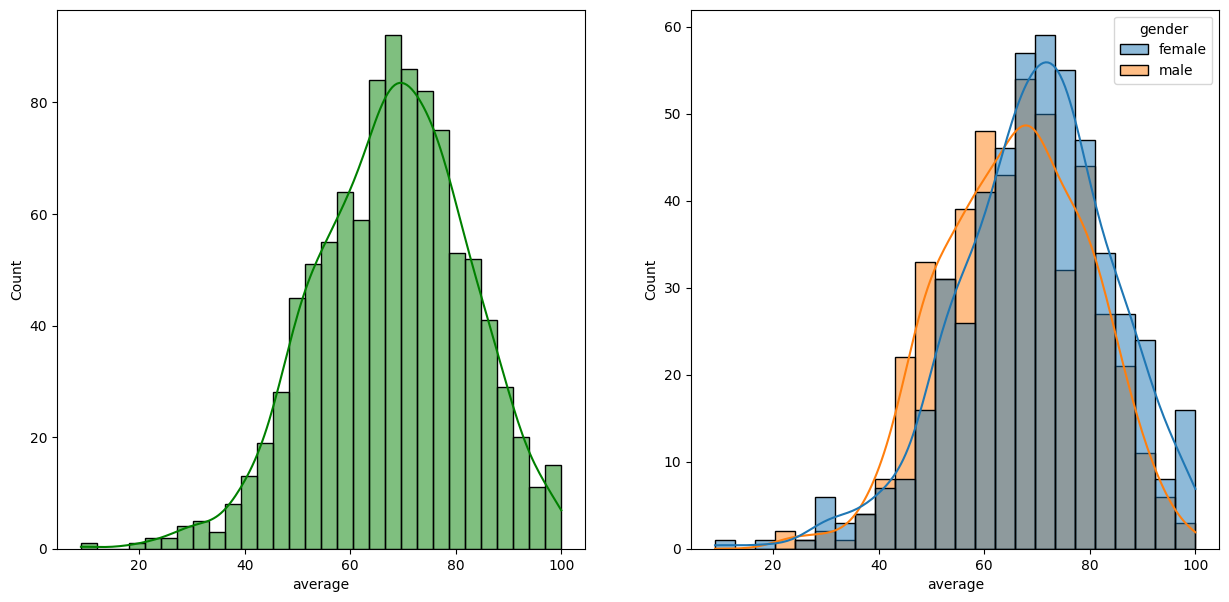

In [74]:
# visualise average scores

fig, axs = plt.subplots(1 , 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = data, x = 'average', bins = 30, kde = True, color='g')
plt.subplot(122)
sns.histplot(data = data, x = 'average', kde = True, hue = 'gender')
plt.show()

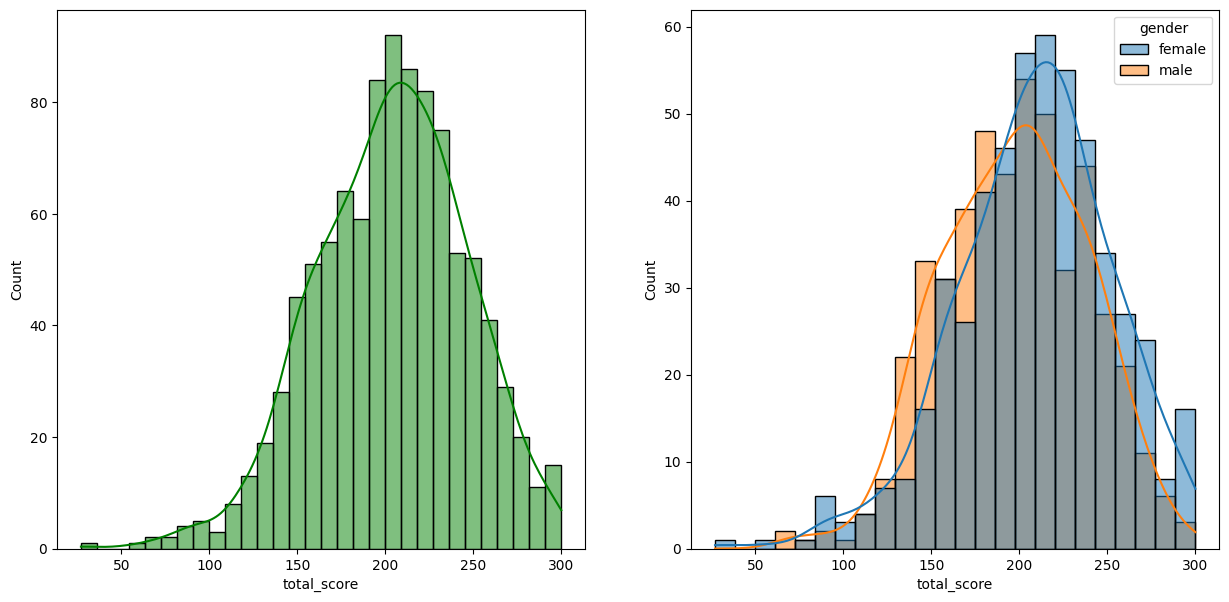

In [75]:
# visualise total scores

fig, axs = plt.subplots(1 , 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = data, x = 'total_score', bins = 30, kde = True, color='g')
plt.subplot(122)
sns.histplot(data = data, x = 'total_score', kde = True, hue = 'gender')
plt.show()

Insights:
- Female students perform well than the male students

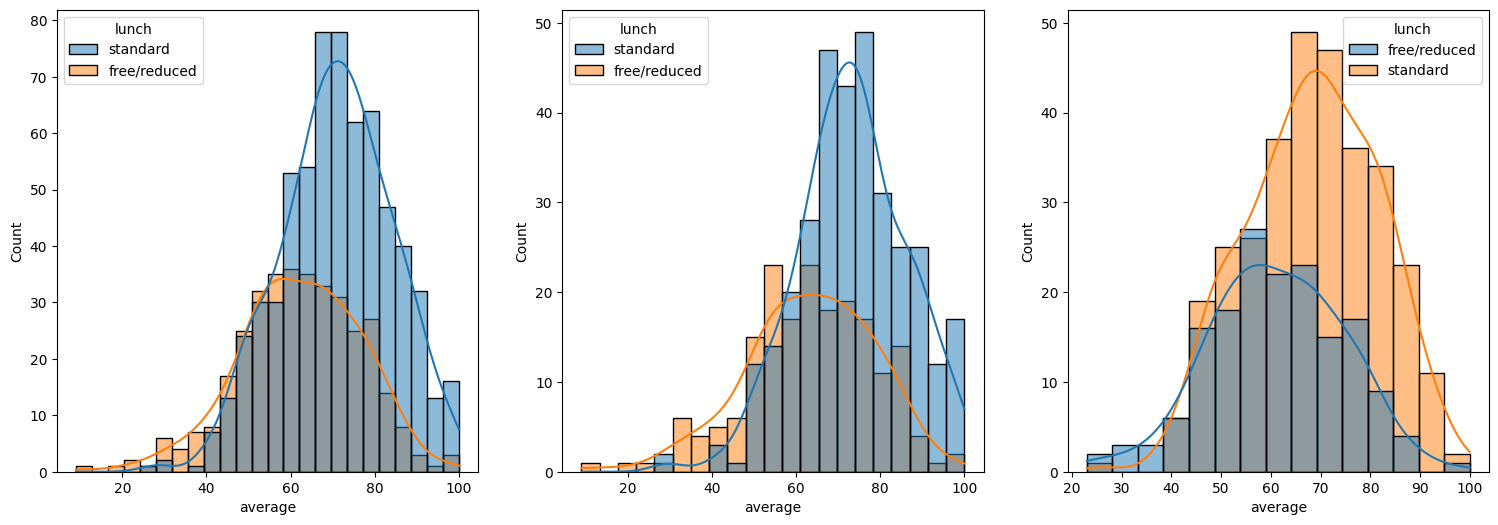

In [76]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights:
- Standard lunch helps to perform well in exams
- Standard lunch helps perform well in exams be it a male or a female

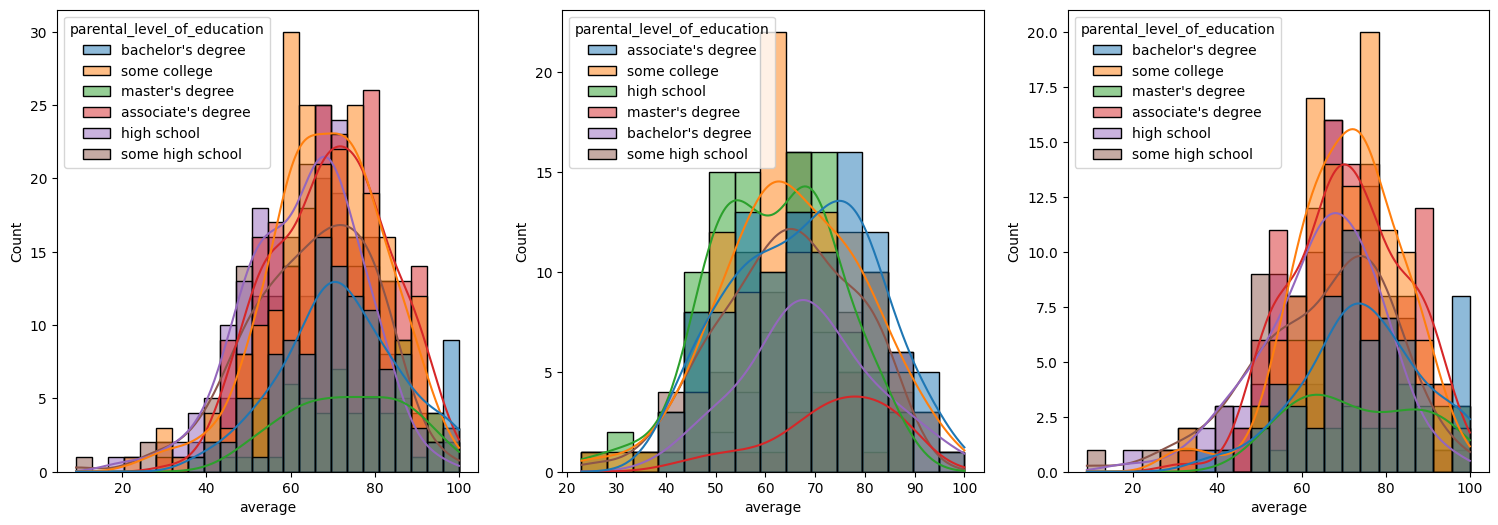

In [77]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

Insights: 
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

In [78]:
data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [79]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [80]:
gender_table = pd.DataFrame(data['gender'].value_counts()).reset_index()
gender_table.columns = ['gender', 'count']

race_ethnicity_table = pd.DataFrame(data['race_ethnicity'].value_counts()).reset_index()
race_ethnicity_table.columns = ['group', 'count']

parent_table = pd.DataFrame(data['parental_level_of_education'].value_counts()).reset_index()
parent_table.columns = ['Education_level', 'count']

lunch_table = pd.DataFrame(data['lunch'].value_counts()).reset_index()
lunch_table.columns = ['category', 'count']

test_preperation_table = pd.DataFrame(data['test_preparation_course'].value_counts()).reset_index()
test_preperation_table.columns = ['status', 'count']

Text(0.5, 1.0, 'Test preperation')

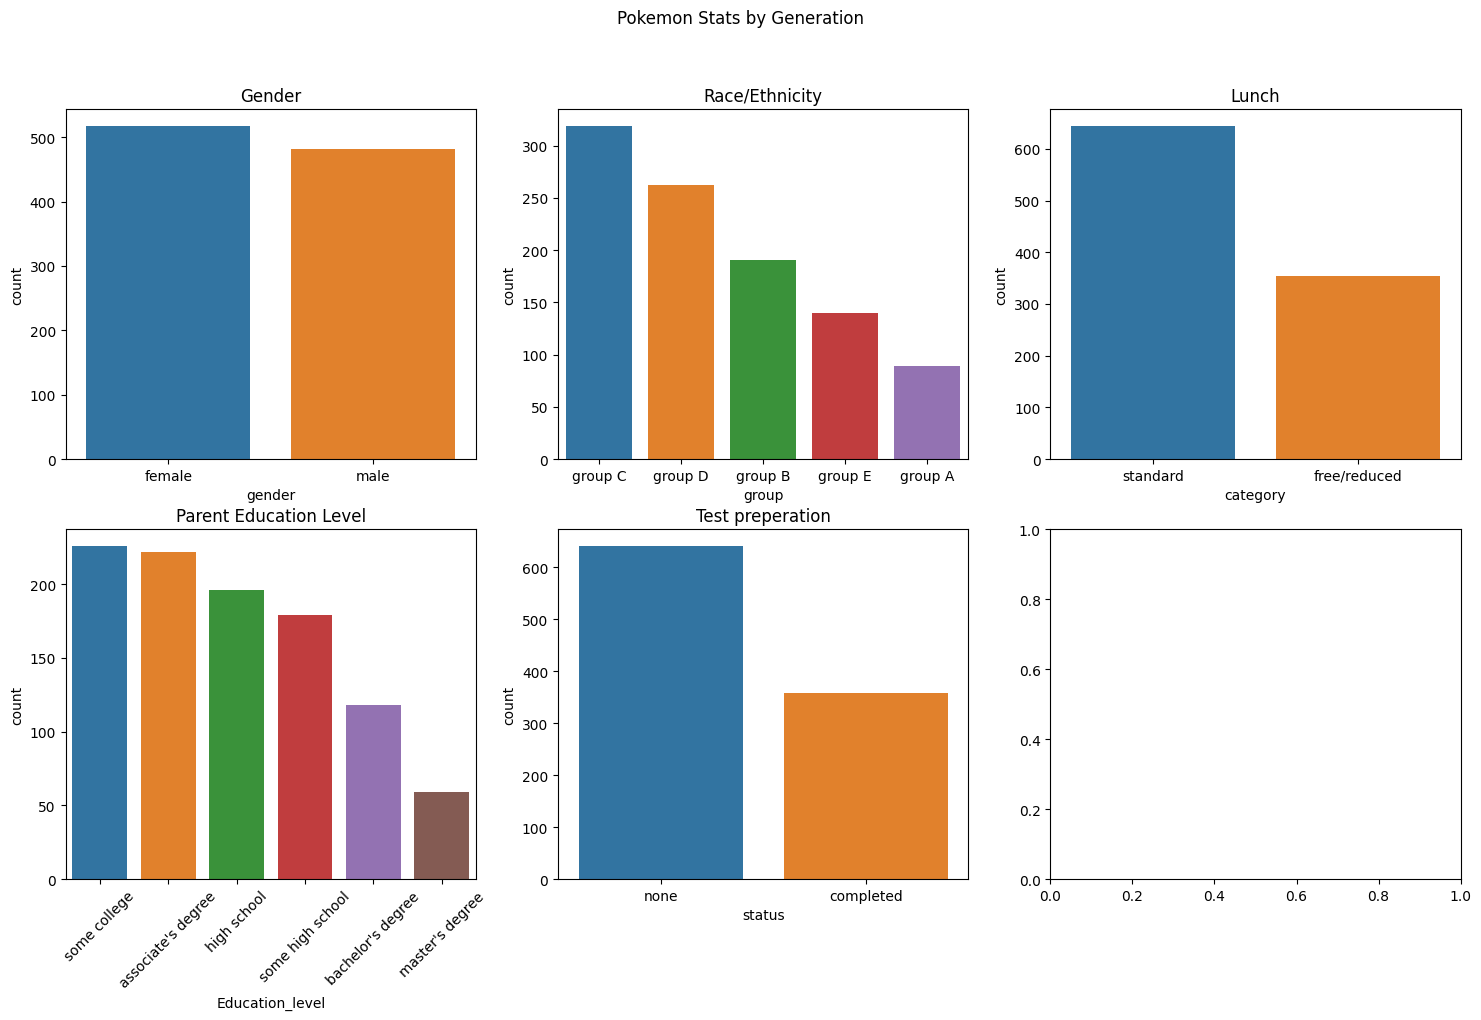

In [81]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('Pokemon Stats by Generation')

sns.barplot(ax=axes[0, 0], data = gender_table, x='gender', y='count', hue = 'gender')
axes[0,0].set_title("Gender")

sns.barplot(ax=axes[0, 1], data=race_ethnicity_table, x='group', y='count', hue ='group')
axes[0,1].set_title("Race/Ethnicity")

sns.barplot(ax=axes[0, 2], data=lunch_table, x='category', y='count', hue = 'category')
axes[0,2].set_title("Lunch")

plot = sns.barplot(ax=axes[1, 0], data=parent_table, x='Education_level', y='count', hue = 'Education_level')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
axes[1,0].set_title("Parent Education Level")

sns.barplot(ax=axes[1, 1], data=test_preperation_table, x='status', y='count', hue = 'status')
axes[1, 1].set_title("Test preperation")

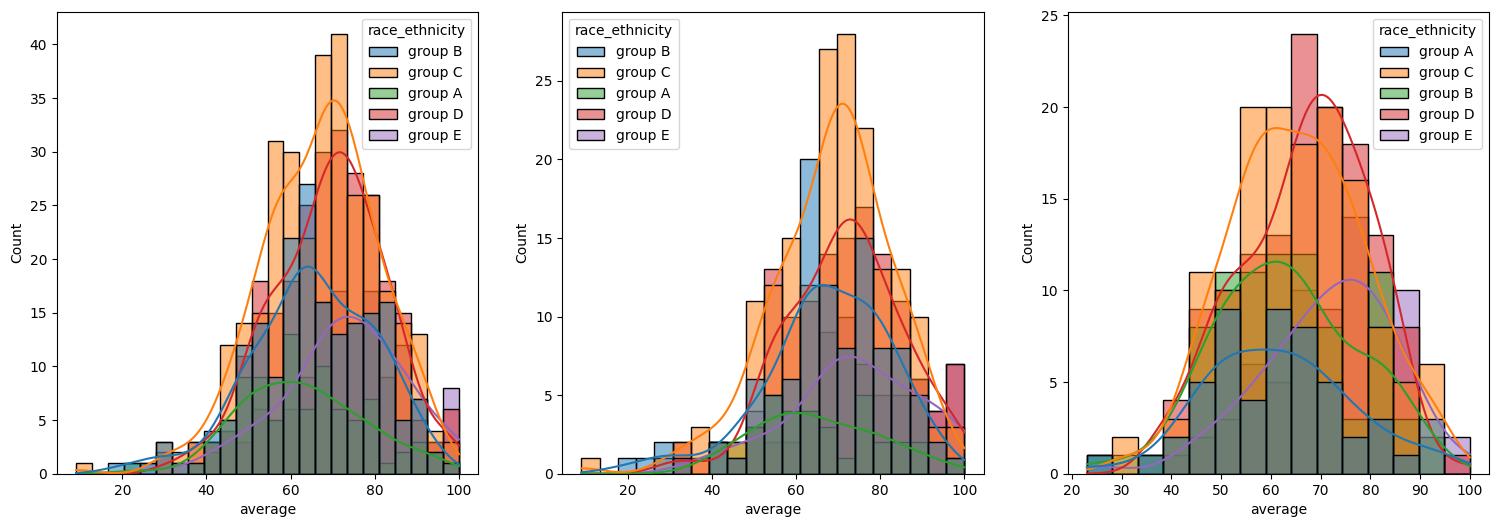

In [82]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=data[data.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=data[data.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Insights:
- Most of the students in Group A and Group B performed poorly in exams
- Male students in Group A perform very poorly in exams
- Female students in Group B perform very poorly in exams

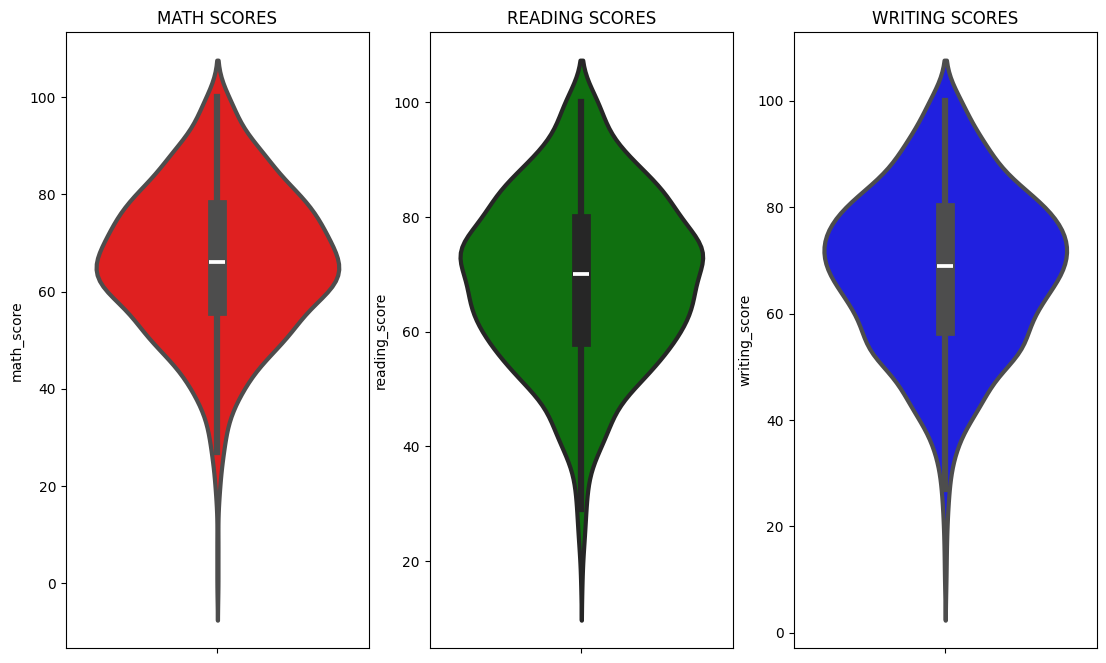

In [83]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=data,color='blue',linewidth=3)
plt.show()

Insights:
- Most of the students score between 60 - 80 in Maths whereas in reading and writing most of them score 50 - 80

In [84]:
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score', 'average'],
      dtype='object')

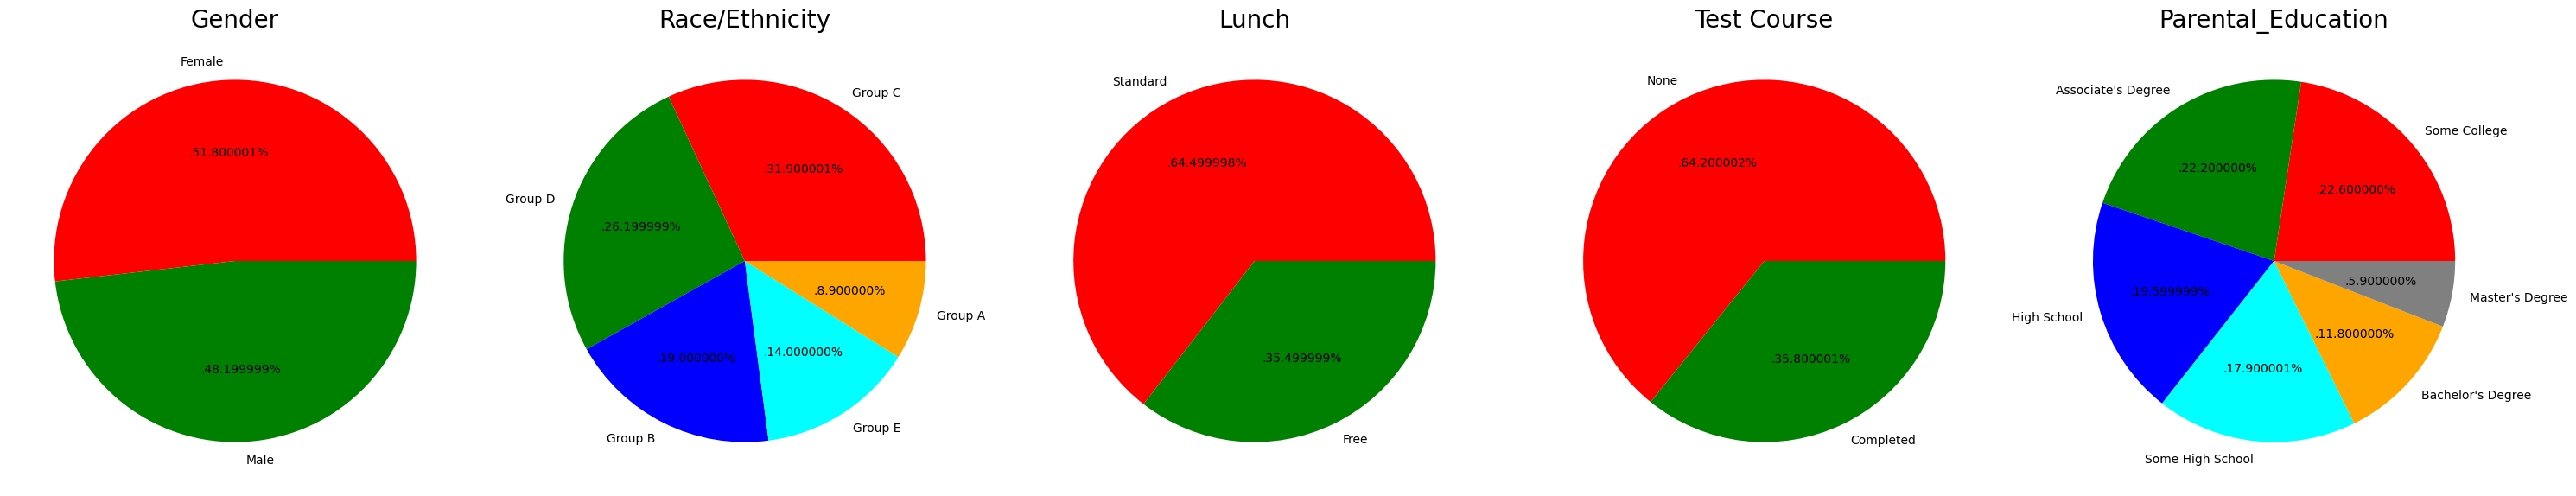

In [85]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = data['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = data['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = data['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = data['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = data['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights:
- Number of Male and female students is almost equal
- Number of students who have standard lunch is greater than who had free lunch
- Around 65% percent students did not completed the test preparation before the exams

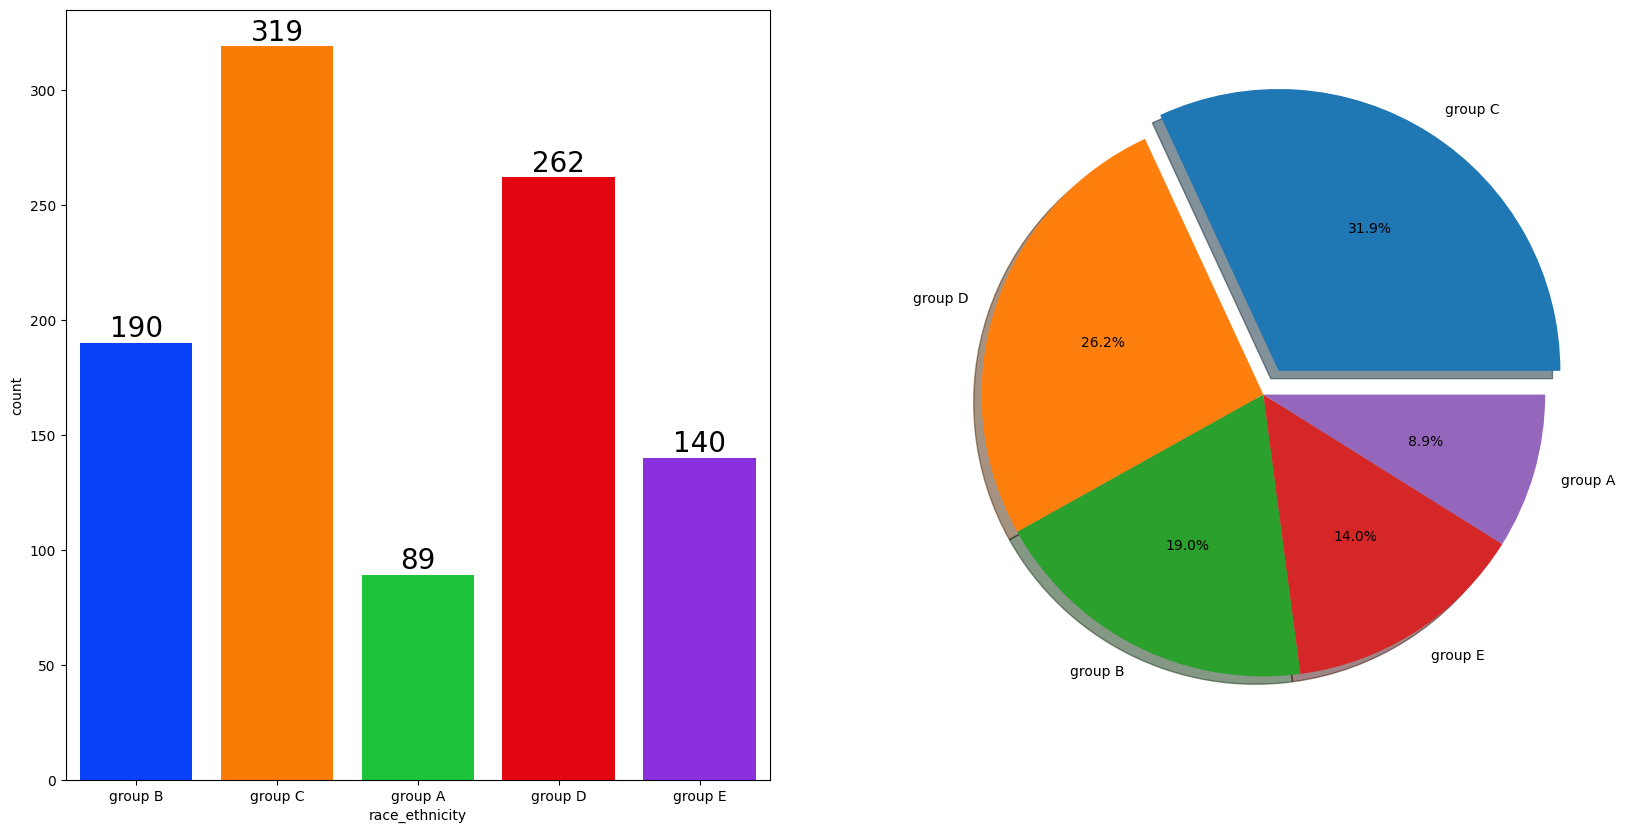

In [86]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=data['race_ethnicity'],data=data,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = data['race_ethnicity'].value_counts(),labels=data['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

## Model Training

In [129]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [130]:
data = pd.read_csv('data/stud.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [131]:
# Preparing X and Y variables

X = data.drop(columns = ['math_score'], axis = 1)
y = data['math_score']

In [135]:
# create column transformer with 3 types of transformers

num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
one_hot_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", one_hot_transformer, cat_features), 
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [136]:
X_trans = preprocessor.fit_transform(X)

In [137]:
X_trans.shape

(1000, 19)

In [138]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

- Since this we are going to predict the Maths score and maths score is a continues value, this prediction will be a regression prediction. So that the evaluation criteria would be the mean squared error

In [139]:
# evaluation metric after model training
def model_evaluation(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [140]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = model_evaluation(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = model_evaluation(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3402
- Mean Absolute Error: 4.2723
- R2 Score: 0.8735
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4214
- Mean Absolute Error: 4.2253
- R2 Score: 0.8792


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7091
- Mean Absolute Error: 4.5175
- R2 Score: 0.8554
-----------------------

In [141]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879216
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850153
8,AdaBoost Regressor,0.848695
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783497
4,Decision Tree,0.769580


According to the above data, the linear regression model would be the perfect model inorder to predict math_score depending on the other variabels

In [142]:
# Linear Regression model

lin_model = LinearRegression(fit_intercept = True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100

print('Accuracy of the model is %.2f' %score)


Accuracy of the model is 87.92


Text(0, 0.5, 'Predicted')

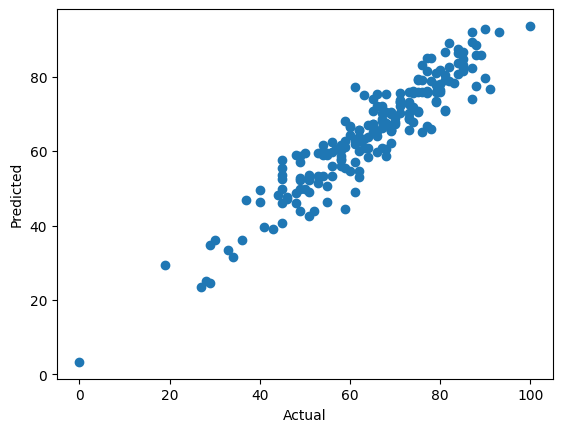

In [147]:
# plot the data
plt.rcParams["figure.figsize"] = (6.4, 4.8)  # 6.4, 4.8 Change the figure size into default


plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

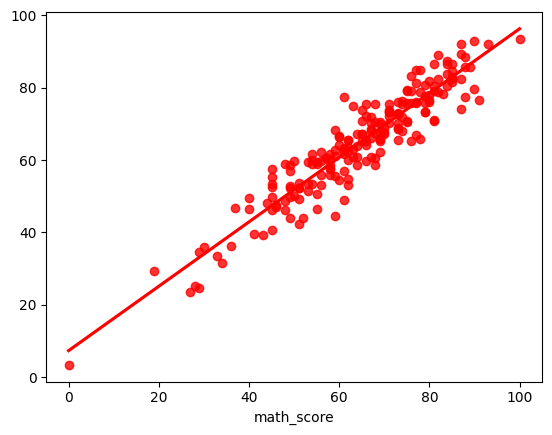

In [146]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Please refer this link to draw learning_curves : https://www.youtube.com/watch?v=0tb9eEgLU6k

In [154]:
train_sizes = [1, 2,3,4]

from sklearn.model_selection import learning_curve

In [155]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = X,
y = y, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [157]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1   -0.000000e+00
2    5.916457e-32
3    2.619048e-01
4    4.010714e-01
dtype: float64

 --------------------

Mean validation scores

 1    6.000000
2    8.650000
3    4.994218
4    1.456378
dtype: float64


(0.0, 40.0)

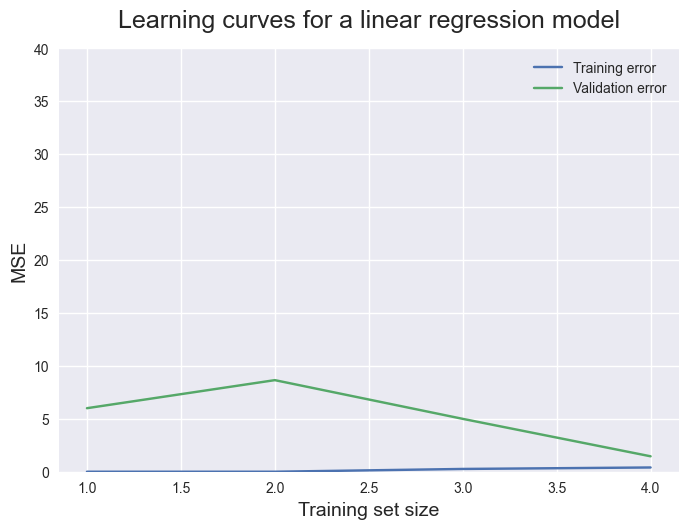

In [158]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)